# Basic libraries for data analisis. Math in machine learning

## Practical task. Analisys of "Titanic" passengers

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Read from file to Pandas.DataFrame object

In [3]:
data = pd.read_csv('titanic.csv')

**The first 5 rows of the table:**

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Consider first 10 elements of Parch column - ammount of parents and children on board:**

In [7]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Choose passengers, who were shipping in Cherbourg (Embarked=C) and paid fare > 200.**

In [9]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [20]:
len(data[(data['Embarked'] == 'C') & (data['Fare'] > 200)])

12

**1. How many people were survived and how many died?**

In [8]:
print("%d people survived" % len(data[(data['Survived'] == 1)]))
print("%d people died" % len(data[(data['Survived'] == 0)]))

342 people survived
549 people died


**2. Print the distribution of the Survived variable separately for men and separately for women.**

In [9]:
print("%d people who survived were men" % len(data[(data['Survived'] == 1) & (data['Sex'] == 'male')]))
print("%d people who survived were women" % len(data[(data['Survived'] == 1) & (data['Sex'] == 'female')]))

109 people who survived were men
233 people who survived were women


**3. What is the median and standard deviation of ticket prices? Also plot a histogram of ticket prices.**

The median of ticket prices is 14.454200 and the standard deviation is 49.693429


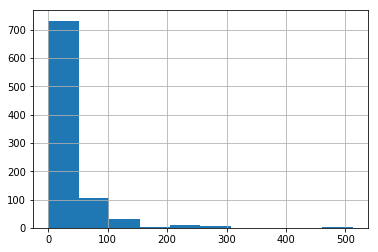

In [20]:
prices = data['Fare']
print("The median of ticket prices is %f and the standard deviation is %f" % (prices.median(), prices.std()))

prices.hist()

**4. Calculate the percent of survivors among people under 25 and over 55. Calculate the average age of survivors.**

In [87]:
concerned = len(data[(data['Age'] < 25)]) 
concerned += len(data[(data['Age'] > 55)]) 
s_under25 = len(data[(data['Survived'] == 1) & (data['Age'] < 25)])
s_over55 = len(data[(data['Survived'] == 1) & (data['Age'] > 55)])

print((s_under25 + s_over55) / concerned)

0.4088050314465409


**5. From what city embarked the most passengers?**

In [94]:
calc = data.groupby('Embarked').count()['PassengerId']
print("most passengers embarked from %s" % calc.idxmax() )

most passengers embarked from S


**6. Calculate the average age of passengers in each of the three classes.**

In [62]:
class1 = data[(data['Pclass'] == 1)]['Age']
class2 = data[(data['Pclass'] == 2)]['Age']
class3 = data[(data['Pclass'] == 3)]['Age']

print("The average ages in each class are : %f, %f, %f" %(class1.mean(), class2.mean(), class3.mean()))

The average ages in each class are : 38.233441, 29.877630, 25.140620


**7. Compare the fare distributions of survived and dead.**

In [51]:
prices_s = data['Fare'][(data['Survived'] == 1)]
prices_d = data['Fare'][(data['Survived'] == 0)]
print("The median of ticket prices for survivor passengers is %f and the standard deviation is %f" % (prices_s.median(), prices_s.std()))
print("The median of ticket prices for dead passengers is %f and the standard deviation is %f" % (prices_d.median(), prices_d.std()))

The median of ticket prices for survivor passengers is 26.000000 and the standard deviation is 66.596998
The median of ticket prices for dead passengers is 10.500000 and the standard deviation is 31.388207


**8. Calculate the average age of surviving men who bought a ticket to Pclass 2.**

In [44]:
data[(data['Pclass'] == 2) & (data['Survived'] == 1)]['Age'].mean()

25.90156626506024

**9. Create a new column that will indicate whether the passenger has relatives. Calculate the correlation between it and Survived column.**

In [85]:
so = data[['SibSp', 'Parch']]
values = []

for element in so.iterrows():
    values.append(max(element[1]['Parch'], element[1]['SibSp']))

for i in range(len(values)):
    if values[i] != 0:
        values[i] = 1
        
data['Relatives'] = values

data_r = len(data[(data['Relatives'] == 1)])
data_r_s = len(data[(data['Survived'] == 1) & (data['Relatives'] == 1)])
data_nr = len(data[(data['Relatives'] == 0)])
data_nr_s = len(data[(data['Survived'] == 1) & (data['Relatives'] == 0)])

print("%f percent of people with relatives survived and %f percent of peaple without died" % (data_r_s/data_r, data_nr_s/data_nr) )

corr_data = data[['Survived', 'Relatives']]

corr_data.corr()

0.505650 percent of people with relatives survived and 0.303538 percent of peaple without died


,Survived,Relatives
Survived,1.000000,0.203367
Relatives,0.203367,1.000000
